In [1]:
from utils.binaries import *
from utils.plotting import *

19:38:18 (   +1.2s) [INFO   ] -- import logging
19:38:18 (  +127ms) [INFO   ] -- import numpy as np
19:38:18 (   +13ms) [INFO   ] -- import uncertainties
19:38:19 (  +344ms) [INFO   ] -- import pandas as pd
19:38:19 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
19:38:19 (    +2ms) [INFO   ] -- import binaries.tools as tools
19:38:19 (  +437ms) [INFO   ] -- import matplotlib.pyplot as plt
19:38:20 (  +541ms) [INFO   ] -- import seaborn as so
19:38:20 (    +2ms) [INFO   ] -- import plotting.tools as plot
19:38:20 (   +10ms) [DEBUG  ] -- font size set to 9.5
19:38:20 (    +1ms) [DEBUG  ] -- label size set to 13.0
19:38:20 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
19:38:20 (    +0ms) [DEBUG  ] -- markersize set to 2.0
19:38:20 (    +1ms) [DEBUG  ] -- usetex set to False


In [2]:
df = pd.read_csv(f'/home/filip/xy-calibration/results/outPositionsComb_13264x.txt', sep=',', names=('time', 'x', 'y', 
                 'event_number', 'user_id', 'temp_led', 'temp_phd', 'temp_board', 'phd_signal', 
                 'FDeventSum'), comment='#', header=0)
df['r'] = np.sqrt(df['x']**2 + df['y']**2)
df = df[df['r'] > 750]


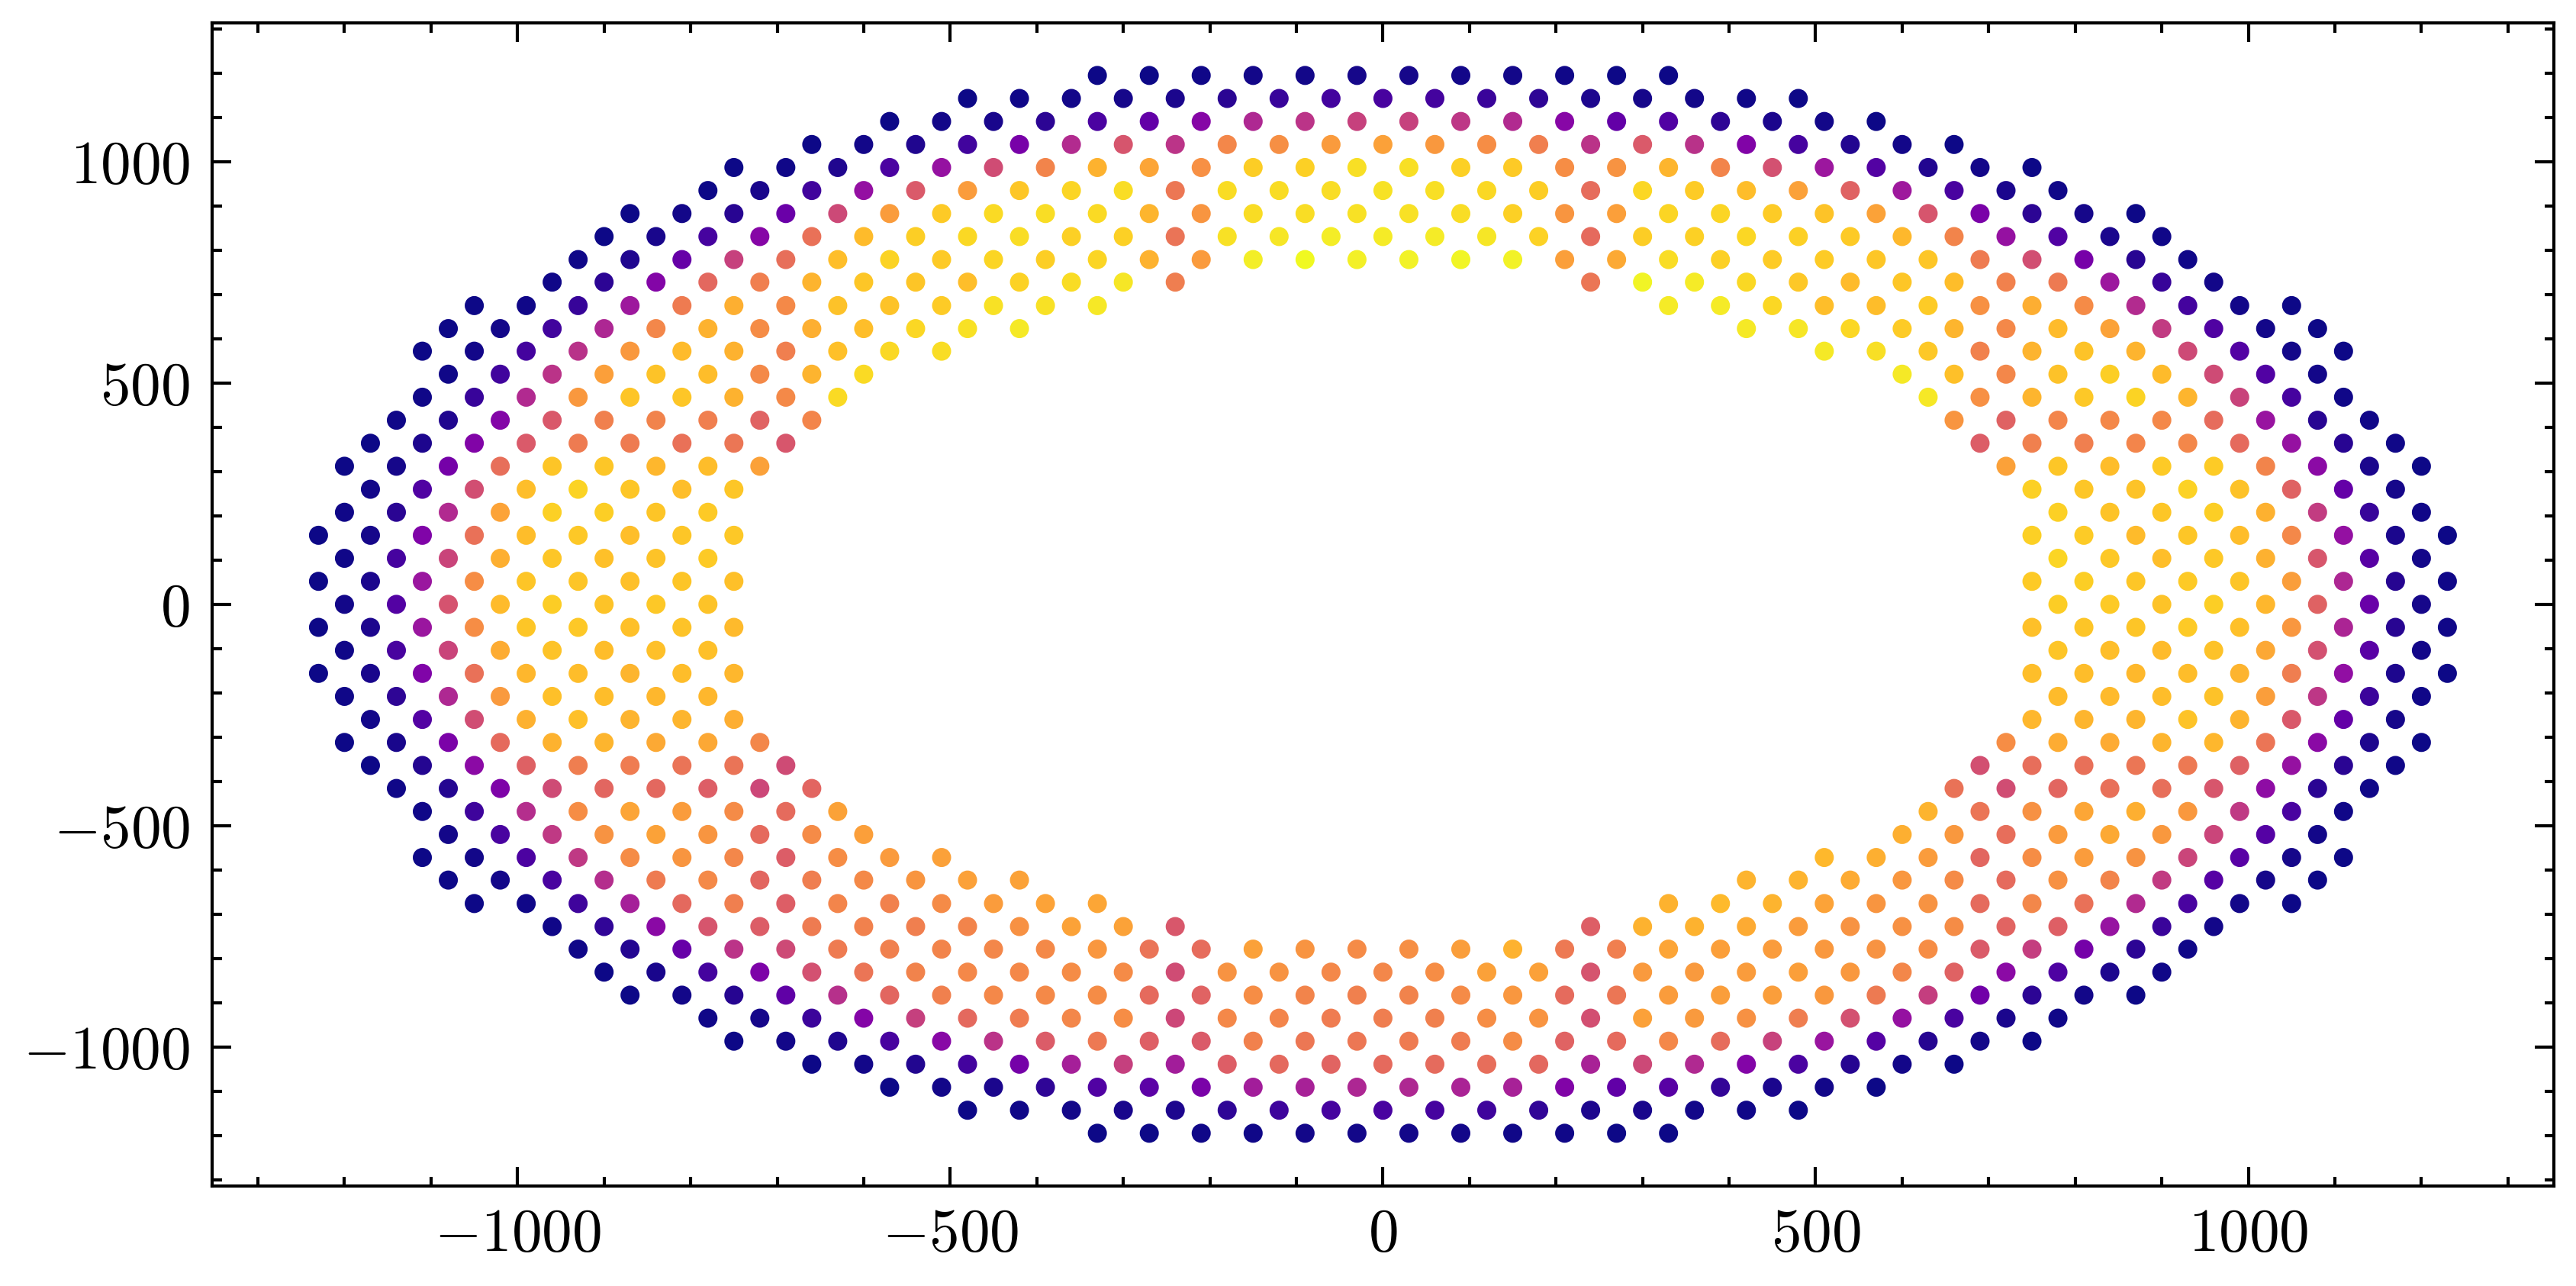

In [3]:
plt.scatter(df['x'], df['y'], c=df['FDeventSum'], cmap='plasma')

In [4]:
print(len(df['x']), len(np.unique(df['x'])))
print(len(df['y']), len(np.unique(df['y'])))

996 83
996 47


In [5]:
row_median, col_median = [], []
X, Y = np.unique(df['x']), np.unique(df['y'])

for x in X:
    col_median.append(np.nanmedian(df[df['x'] == x]['FDeventSum']))
for y in Y:
    row_median.append(np.nanmedian(df[df['y'] == y]['FDeventSum']))

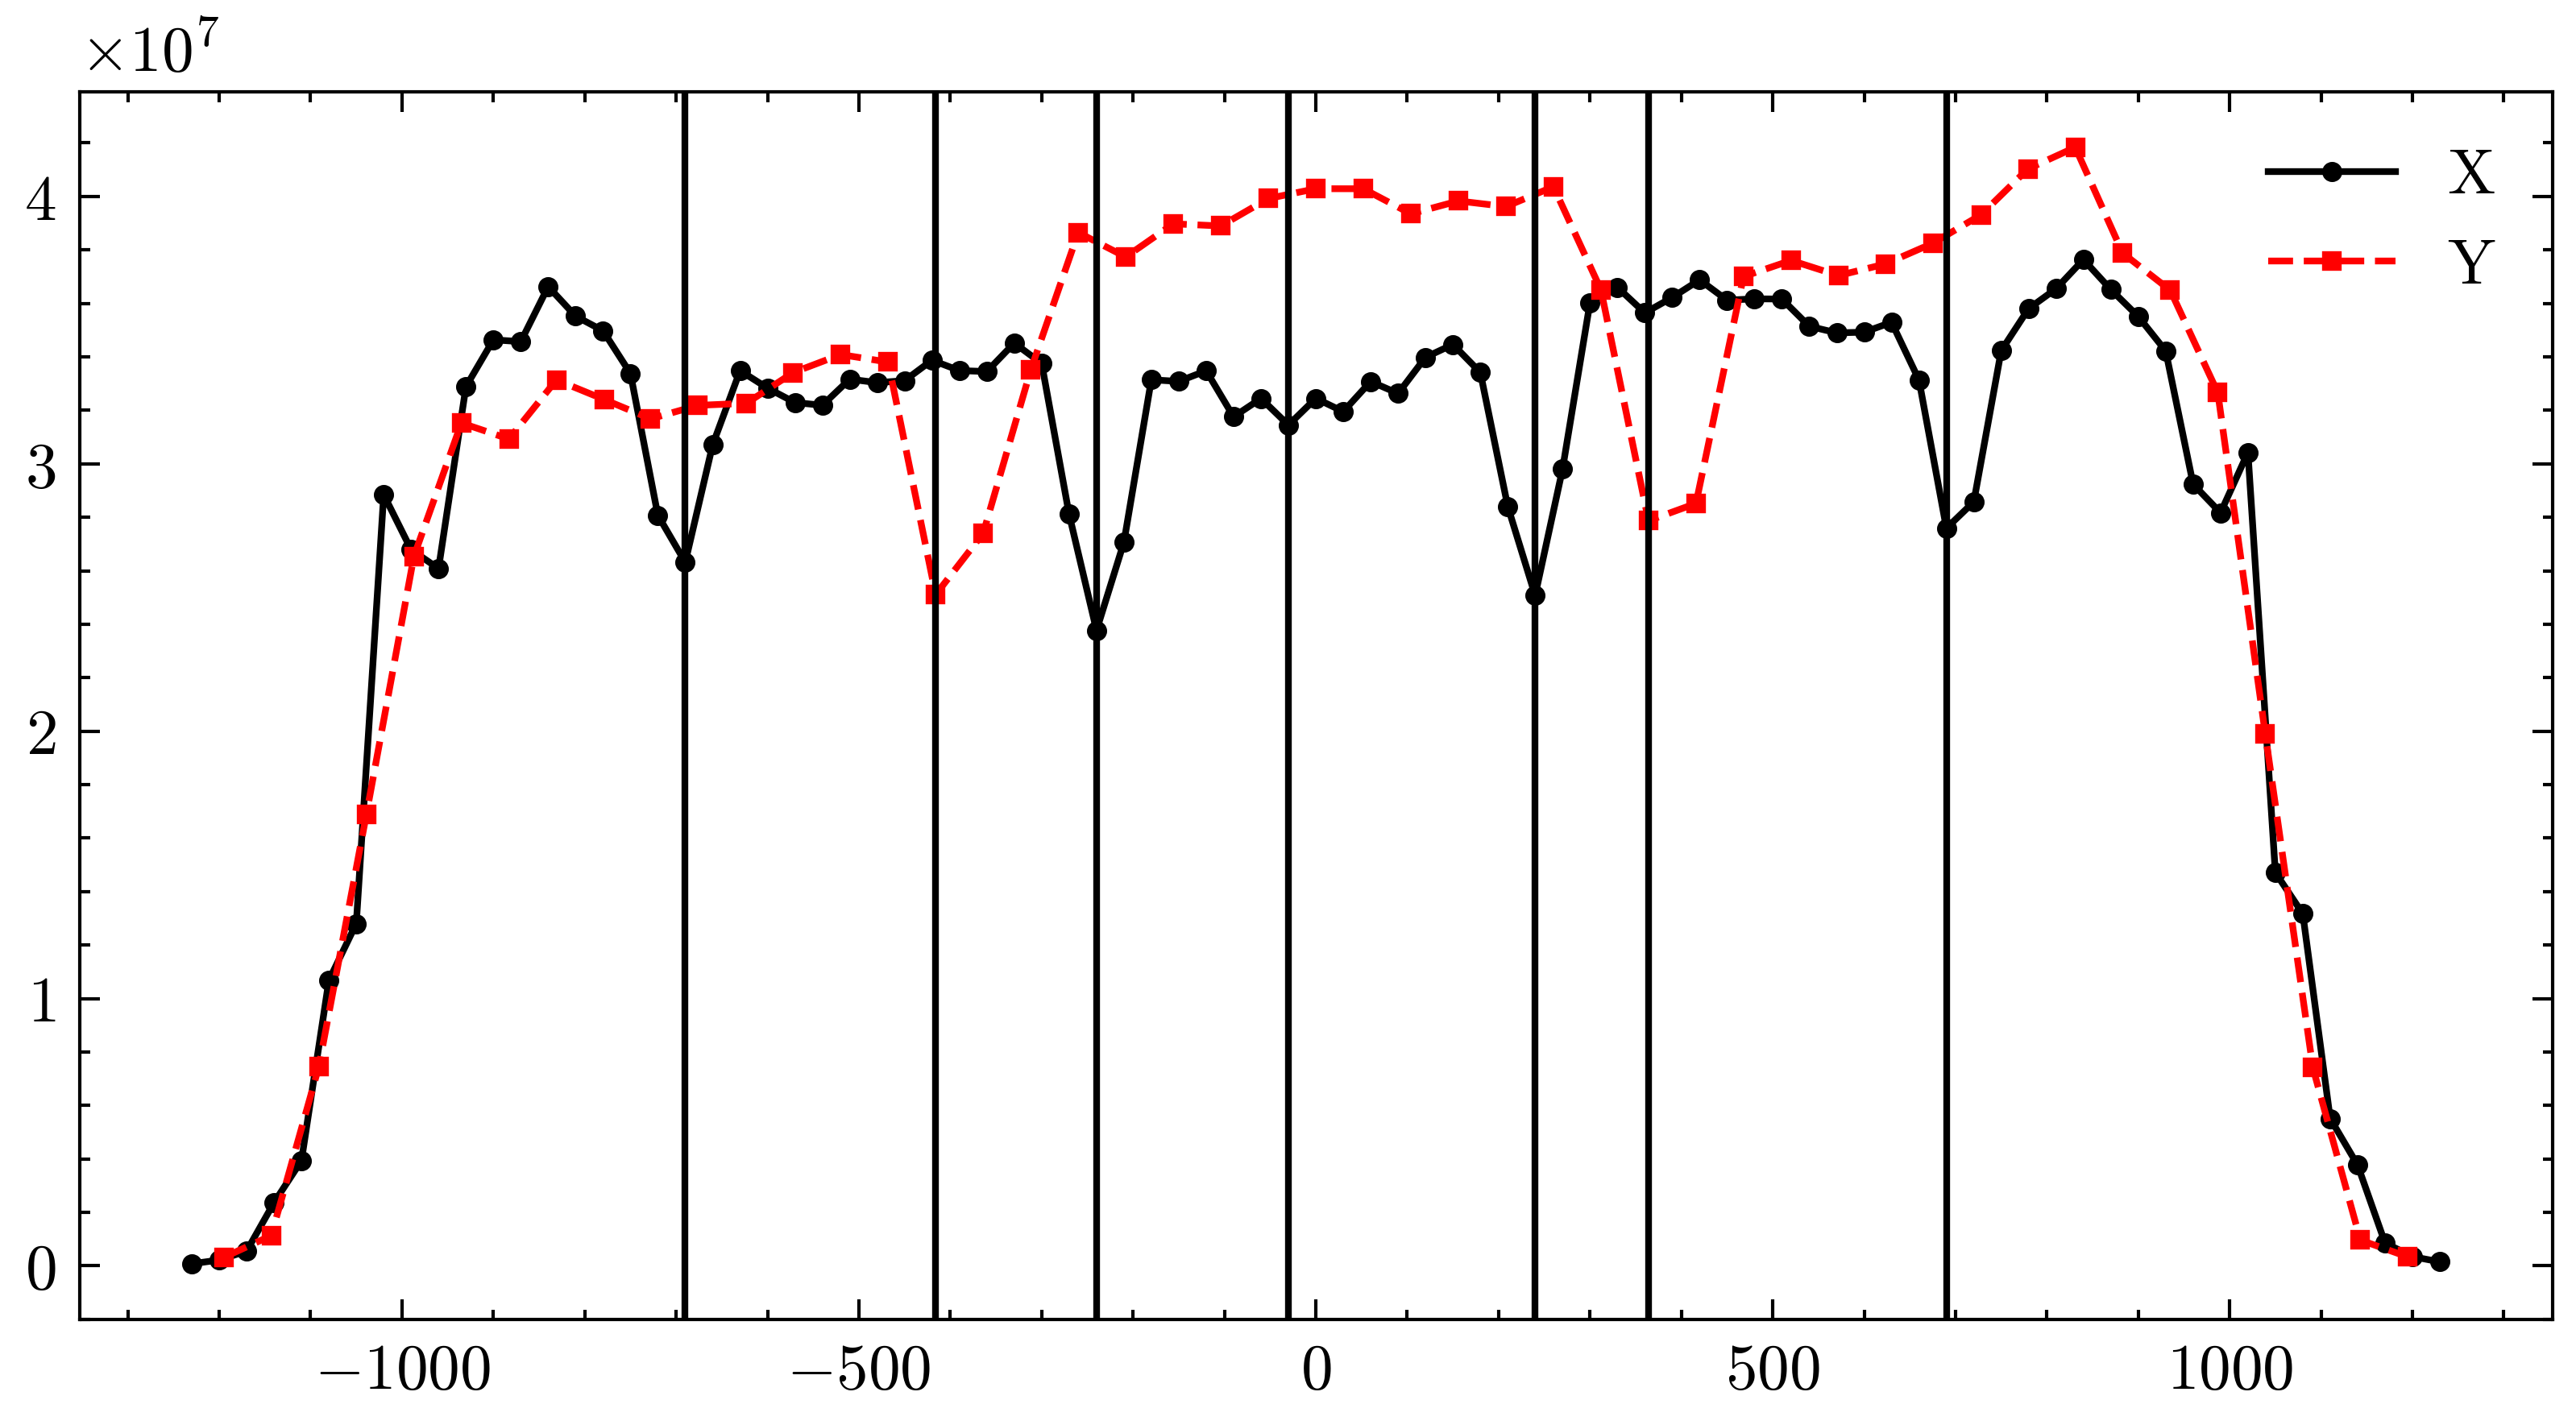

In [6]:
from scipy.signal import argrelmin

filter_x = argrelmin(np.array(col_median), order=5)[0]
filter_y = argrelmin(np.array(row_median), order=5)[0]

plt.plot(X, col_median, label='X')
plt.plot(Y, row_median, label='Y')

for x in filter_x:
    plt.axvline(X[x])
for y in filter_y:
    plt.axvline(Y[y])

# plt.yscale('log')
plt.legend()